# **Classification Muffins and Cupcakes with SVM**

# Step 1: Import Packages

In [5]:
from sklearn.svm import SVC # for classification
from sklearn.svm import SVR # for regression

In [6]:
from sklearn.svm import SVC

In [7]:
# packages for analysis
import numpy as np
import pandas as pd

# packages for visuals

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allow charts to appear inthe notebook
%matplotlib inline


# **Step 2: Import data**

In [8]:
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv("recipes_muffins_cupcakes.csv")
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


In [9]:
# Each category count
recipes.columns

Index(['Type', 'Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder',
       'Vanilla', 'Salt'],
      dtype='object')

In [10]:
recipes.Type.value_counts()

Type
Muffin     10
Cupcake    10
Name: count, dtype: int64

# **Step 3: Prepare the Data**

**sns.lmplot()**: provides a high-level interface for drawing attractive and informative statistical graphics. The lmplot() function specifically is used to plot data and regression models on a FacetGrid.

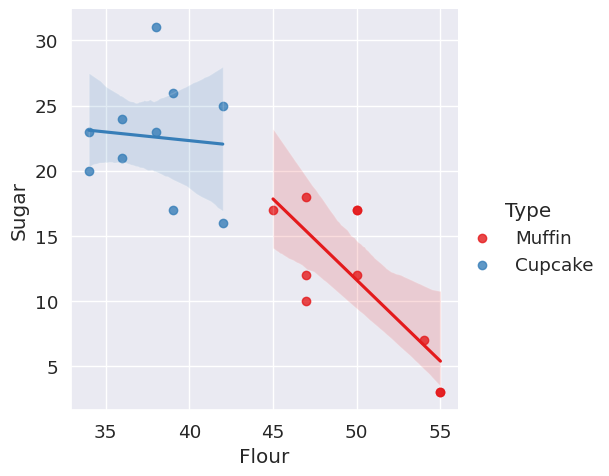

In [11]:
# Plot two ingredients using regression plot
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1')

In [12]:
recipes[['Flour', 'Sugar']]

,Flour,Sugar
0,55,3
1,47,12
2,47,18
3,45,17
4,50,12
5,55,3
6,54,7
7,47,10
8,50,17
9,50,17


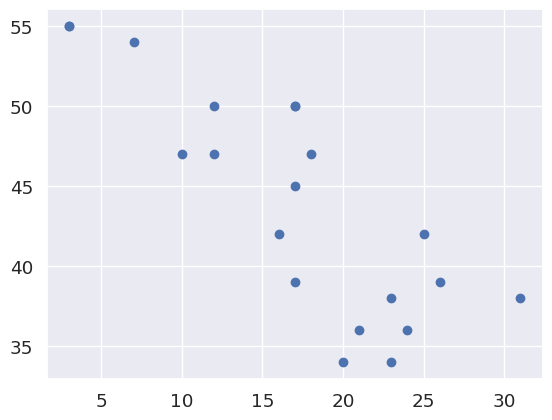

In [13]:
plt.scatter(recipes.Sugar,recipes.Flour)

In [14]:
# Specify inputs  for the model
# ingredients = recipes[['Flour','Milk, 'Sugar','Butter','Egg','Baking Powder']]

#input: X

ingredients = recipes[['Flour', 'Sugar']]
ingredients[:3]

,Flour,Sugar
0,55,3
1,47,12
2,47,18


In [15]:
recipes.Type[:2]

0    Muffin
1    Muffin
Name: Type, dtype: object

In [16]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           20 non-null     object
 1   Flour          20 non-null     int64 
 2   Milk           20 non-null     int64 
 3   Sugar          20 non-null     int64 
 4   Butter         20 non-null     int64 
 5   Egg            20 non-null     int64 
 6   Baking Powder  20 non-null     int64 
 7   Vanilla        20 non-null     int64 
 8   Salt           20 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.5+ KB


In [17]:
recipes.Type.value_counts()

Type
Muffin     10
Cupcake    10
Name: count, dtype: int64

In [18]:
# In Type column we have categorical data, it is needed to be converted into Numerical
# output y == convert muffin as 0 and cupcake as 1

np.where(recipes['Type']=='Muffin', 0, 1)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
# recipes.Type.map({'Muffin':0, 'Cupcake':1})

In [20]:
# sklearn contain LabelEncoder to convert categorical data into numeric
from sklearn.preprocessing import LabelEncoder

In [21]:
# create an object of LabelEncoder

lb = LabelEncoder()

In [22]:
lb

LabelEncoder()

In [23]:
#fit n transform
type_label = lb.fit_transform(recipes.Type)

In [24]:
type_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
lb.classes_

array(['Cupcake', 'Muffin'], dtype=object)

In [26]:
type_label.dtype

dtype('int64')

In [27]:
recipes.Type = type_label

In [28]:
recipes[:5]

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,1,55,28,3,7,5,2,0,0
1,1,47,24,12,6,9,1,0,0
2,1,47,23,18,6,4,1,0,0
3,1,45,11,17,17,8,1,0,0
4,1,50,25,12,6,5,2,1,0


# **Step 4: Fit the model**

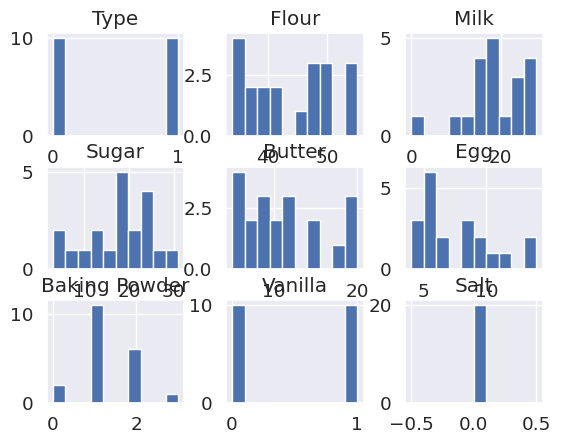

In [29]:
# from sklearn.svm import SVC

recipes.hist()
plt.show()

In [30]:
ingredients[:5]

,Flour,Sugar
0,55,3
1,47,12
2,47,18
3,45,17
4,50,12


In [31]:
# fit the SVM model

model = SVC(kernel = 'linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [32]:
# check the data accuracy

model.score(ingredients, type_label)*100

100.0

In [33]:
# Fit the SVM model

# kernel = 'rbf' default --> Used for multiclass not for binary

model2 = SVC()
model2.fit(ingredients, type_label)

SVC()

In [34]:
# check data accuracy
model2.score(ingredients, type_label)*100

95.0

Step 5: Visualize Results


In [35]:
ingredients[:2]

,Flour,Sugar
0,55,3
1,47,12


In [36]:
model

SVC(kernel='linear')

In [37]:
model.predict([[55,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

In [38]:
model.coef_ # slope m[m1,m2]

array([[ 6.66537262e-01, -4.85266891e-05]])

In [39]:
model.intercept_ #c

array([-28.99349742])

In [40]:
# if u check model2
model2

SVC()

In [41]:
# model2.coef_
#coef_ is only available when using a linear kernel

In [56]:
ingredients

,Flour,Sugar
0,55,3
1,47,12
2,47,18
3,45,17
4,50,12
5,55,3
6,54,7
7,47,10
8,50,17
9,50,17


In [61]:
y_actual=type_label

In [60]:
# Check model accuracy
y_pred = model.predict(ingredients)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [66]:
# Check model accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_actual, y_pred)*100
accuracy

100.0

# **Testing**

In [42]:
recipes.Type[:3]

0    1
1    1
2    1
Name: Type, dtype: int64

In [43]:
# flour and sugar data
model.predict([[90,100]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

**Support vectors** are the data points that lie closest to the decision boundary (hyperplane) and are crucial in defining the decision boundary.

In [44]:
# check support  vectors
sv =model.support_vectors_
sv

array([[42., 16.],
       [42., 25.],
       [45., 17.]])

Text(0, 0.5, 'Sugar')

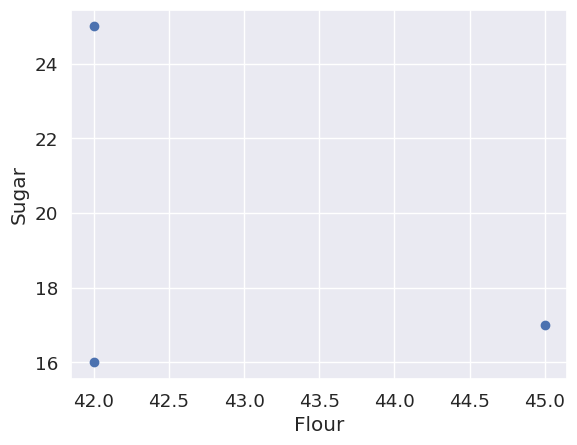

In [45]:
plt.scatter(sv[:,0], sv[:,1])
plt.xlabel('Flour')
plt.ylabel('Sugar')

In [46]:
model.support_

array([11, 15,  3], dtype=int32)

In [47]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1] #main hyperplane

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

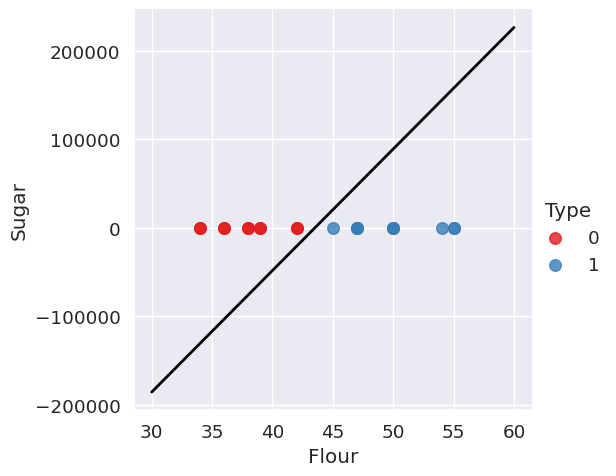

In [48]:
# plot the hyperplane
sns.lmplot(x= 'Flour', y='Sugar', data=recipes, hue= 'Type', palette='Set1',fit_reg=False, scatter_kws={'s':70})
plt.plot(xx,yy, linewidth =2, color='black');

In [49]:
model.support_vectors_[:,:]

array([[42., 16.],
       [42., 25.],
       [45., 17.]])

(0.0, 40.0)

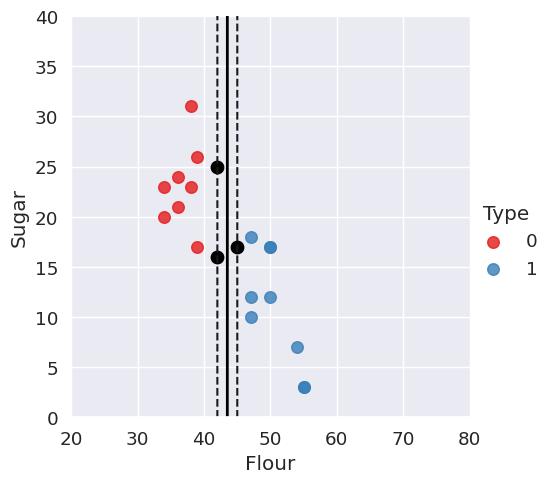

In [50]:
# Look at the margins and support vectors
#data samples
sns.lmplot(x='Flour',y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

plt.plot(xx, yy, linewidth=2, color='black')#hyperplane
plt.plot(xx, yy_down, 'k--') #marginLine1
plt.plot(xx, yy_up, 'k--') #margineLine2
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='black');

plt.xlim(20, 80)  # Replace x_min and x_max with your desired limits
plt.ylim(0, 40)

# **Step 6: Predict New case**

In [51]:
# Create a function to guesss when a recipes is a muffin or a cupcake

def muffin_or_cupcake(flour, sugar):
  if(model.predict([[flour, sugar]]))==1:
    print('You\'re looking at a muffin recipe!')
  else:
    print('You\'re looking at a cupcake recipe!')


In [52]:
# Predict if 50 parts flour and 20 parts sugar

muffin_or_cupcake(50,20)

You're looking at a muffin recipe!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


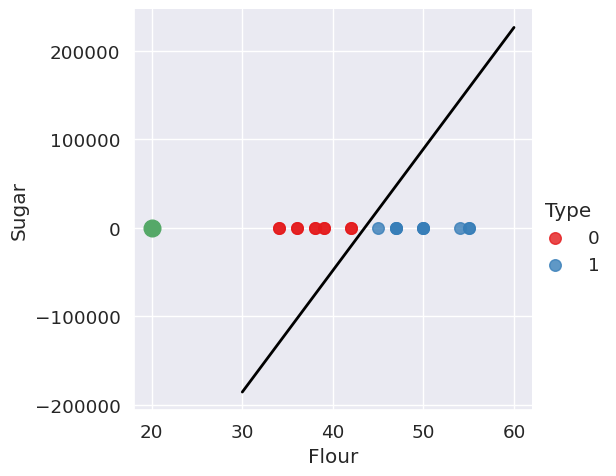

In [53]:
# Plot the points to visually see where the point lies

# plot the hyperplane
sns.lmplot(x= 'Flour', y='Sugar', data=recipes, hue= 'Type', palette='Set1',fit_reg=False, scatter_kws={'s':70})
plt.plot(xx,yy, linewidth =2, color='black');

plt.plot(20,100,'go', markersize='12') # test input

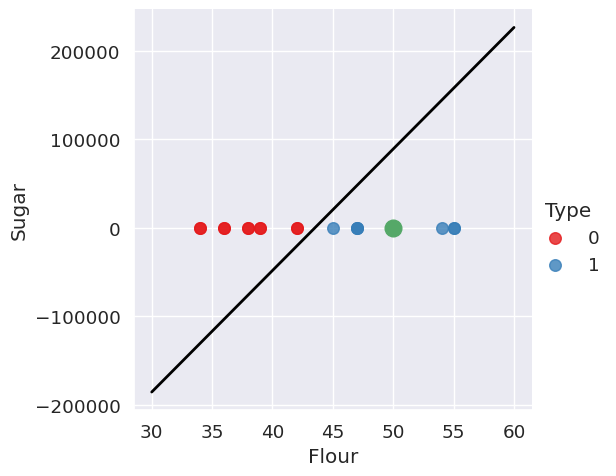

In [54]:
# plot the hyperplane
sns.lmplot(x= 'Flour', y='Sugar', data=recipes, hue= 'Type', palette='Set1',fit_reg=False, scatter_kws={'s':70})
plt.plot(xx,yy, linewidth =2, color='black');

plt.plot(50,100,'go', markersize='12') # test input

In [67]:
# Create a pickle file using serialization
import pickle
pickle_out = open('classifier.pkl', 'wb')
pickle.dump(model, pickle_out)
pickle_out.close()

In [70]:
model.predict([[50,10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

In [72]:
muffin_or_cupcake(40,50)

You're looking at a cupcake recipe!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
